In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv1D, MaxPooling1D, Flatten, MaxPooling2D, Conv2D, BatchNormalization

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

In [2]:
first = pd.read_csv("dataset.csv")

In [ ]:
first.head()

,Unnamed: 0,ID,AGE,PackHistory,COPDSEVERITY,MWT1,MWT2,MWT1Best,FEV1,FEV1PRED,...,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
0,1,58,77,60.0,SEVERE,120.0,120.0,120.0,1.21,36.0,...,69.55,4,3,1,2,1,0,0,1,0
1,2,57,79,50.0,MODERATE,165.0,176.0,176.0,1.09,56.0,...,44.24,4,2,0,2,1,0,0,1,1
2,3,62,80,11.0,MODERATE,201.0,180.0,201.0,1.52,68.0,...,44.09,4,2,0,2,1,0,0,1,0
3,4,145,56,60.0,VERY SEVERE,210.0,210.0,210.0,0.47,14.0,...,62.04,1,4,1,2,0,0,1,1,0
4,5,136,65,68.0,SEVERE,204.0,210.0,210.0,1.07,42.0,...,75.56,1,3,1,2,0,1,1,0,0


In [ ]:
first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    101 non-null    int64  
 1   ID            101 non-null    int64  
 2   AGE           101 non-null    int64  
 3   PackHistory   101 non-null    float64
 4   COPDSEVERITY  101 non-null    object 
 5   MWT1          99 non-null     float64
 6   MWT2          100 non-null    float64
 7   MWT1Best      100 non-null    float64
 8   FEV1          101 non-null    float64
 9   FEV1PRED      101 non-null    float64
 10  FVC           101 non-null    float64
 11  FVCPRED       101 non-null    int64  
 12  CAT           101 non-null    int64  
 13  HAD           101 non-null    float64
 14  SGRQ          101 non-null    float64
 15  AGEquartiles  101 non-null    int64  
 16  copd          101 non-null    int64  
 17  gender        101 non-null    int64  
 18  smoking       101 non-null    

In [2]:
# Unzip the file
!unzip RespiratoryDatabase@TR.zip

Archive:  RespiratoryDatabase@TR.zip
   creating: RespiratoryDatabase@TR/
  inflating: __MACOSX/._RespiratoryDatabase@TR  
  inflating: RespiratoryDatabase@TR/.DS_Store  
  inflating: __MACOSX/RespiratoryDatabase@TR/._.DS_Store  
   creating: RespiratoryDatabase@TR/RespiratoryDatabase@TR/
  inflating: __MACOSX/RespiratoryDatabase@TR/._RespiratoryDatabase@TR  
  inflating: RespiratoryDatabase@TR/Labels.xlsx  
  inflating: __MACOSX/RespiratoryDatabase@TR/._Labels.xlsx  
  inflating: RespiratoryDatabase@TR/RespiratoryDatabase@TR/H010_L5.wav  
  inflating: __MACOSX/RespiratoryDatabase@TR/RespiratoryDatabase@TR/._H010_L5.wav  
  inflating: RespiratoryDatabase@TR/RespiratoryDatabase@TR/H045_L4.wav  
  inflating: __MACOSX/RespiratoryDatabase@TR/RespiratoryDatabase@TR/._H045_L4.wav  
  inflating: RespiratoryDatabase@TR/RespiratoryDatabase@TR/H041_R6.wav  
  inflating: __MACOSX/RespiratoryDatabase@TR/RespiratoryDatabase@TR/._H041_R6.wav  
  inflating: RespiratoryDatabase@TR/RespiratoryDatabase@

In [4]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 1.8 MB/s eta 0:00:00


In [3]:
# Read the labels file into a dataframe
labels = pd.read_excel("/content/RespiratoryDatabase@TR/Labels.xlsx", sheet_name="Sayfa1")

In [4]:
import librosa
import os

def read_wav_data(folder_path):
  """
  Reads all .wav files in a given folder and returns a list of arrays containing the audio data.

  Args:
    folder_path: The path to the folder containing the .wav files.

  Returns:
    A list of arrays containing the audio data for each .wav file.
  """

  audio_data = []
  sample_rates = []
  for filename in os.listdir(folder_path):
    if filename.endswith(".wav"):
      file_path = os.path.join(folder_path, filename)
      audio, sample_rate = librosa.load(file_path)
      audio_data.append(np.array(audio))
      sample_rates.append(sample_rate)

  return audio_data, sample_rates

In [5]:
audios, sample_rates = read_wav_data("/content/RespiratoryDatabase@TR/RespiratoryDatabase@TR")

In [ ]:
labels.head()

,Patient ID,Diagnosis
0,H002,COPD4
1,H003,COPD4
2,H004,COPD4
3,H005,COPD4
4,H006,COPD4


In [ ]:
#check statistcal description of the first dataset
first.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,101.0,51.000000,29.300171,1.00,26.00,51.00,76.00,101.00
ID,101.0,91.405941,51.516246,1.00,49.00,87.00,143.00,169.00
AGE,101.0,70.099010,7.898740,44.00,65.00,71.00,75.00,88.00
PackHistory,101.0,39.698020,24.558713,1.00,20.00,36.00,54.00,109.00
MWT1,99.0,385.858586,104.744199,120.00,300.00,419.00,460.50,688.00
MWT2,100.0,390.280000,107.754498,120.00,303.75,399.00,459.00,699.00
MWT1Best,100.0,399.110000,106.550116,120.00,303.75,420.00,465.25,699.00
FEV1,101.0,1.603762,0.672763,0.45,1.10,1.60,1.96,3.18
FEV1PRED,101.0,58.531485,22.294821,3.29,42.00,60.00,75.00,102.00
FVC,101.0,2.954950,0.976283,1.14,2.27,2.77,3.63,5.37


In [3]:
# Find columns that do not have up to 101 as count
cols_to_fill = first.columns[first.count() < 101]

# Fill empty cells with the mean of the column
for col in cols_to_fill:
  first[col].fillna(first[col].mean(), inplace=True)

In [4]:
first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    101 non-null    int64  
 1   ID            101 non-null    int64  
 2   AGE           101 non-null    int64  
 3   PackHistory   101 non-null    float64
 4   COPDSEVERITY  101 non-null    object 
 5   MWT1          101 non-null    float64
 6   MWT2          101 non-null    float64
 7   MWT1Best      101 non-null    float64
 8   FEV1          101 non-null    float64
 9   FEV1PRED      101 non-null    float64
 10  FVC           101 non-null    float64
 11  FVCPRED       101 non-null    int64  
 12  CAT           101 non-null    int64  
 13  HAD           101 non-null    float64
 14  SGRQ          101 non-null    float64
 15  AGEquartiles  101 non-null    int64  
 16  copd          101 non-null    int64  
 17  gender        101 non-null    int64  
 18  smoking       101 non-null    

## PATIENT DATA EXPLORATION

<ipython-input-25-074df43e80ac>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(first['AGE'], hist=False, kde=True, kde_kws={'shade': True, 'linewidth': 3})
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


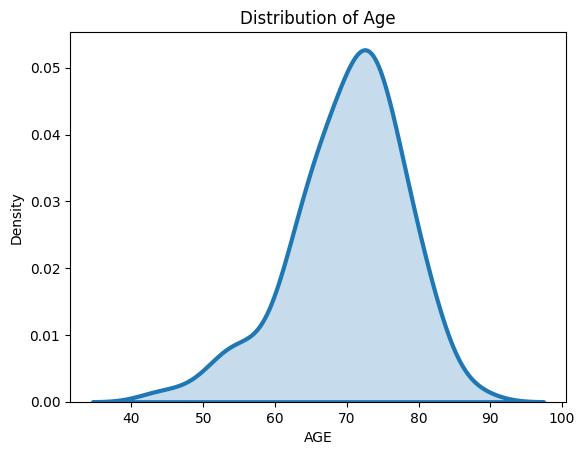

In [ ]:
#PLOT AGE DISTRIBUTION
sns.distplot(first['AGE'], hist=False, kde=True, kde_kws={'shade': True, 'linewidth': 3})
plt.title('Distribution of Age')
plt.show()

<ipython-input-27-f9626e9b98ce>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(first['PackHistory'], hist=False, kde=True, kde_kws={'shade': True, 'linewidth': 3})
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


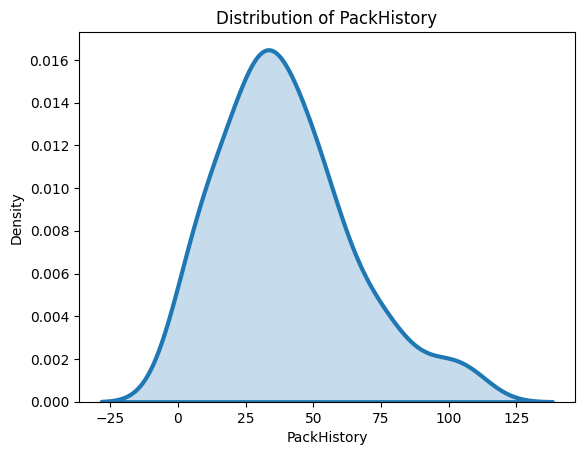

In [ ]:
#PLOT PackHistory DISTRIBUTION
sns.distplot(first['PackHistory'], hist=False, kde=True, kde_kws={'shade': True, 'linewidth': 3})
plt.title('Distribution of PackHistory')
plt.show()

<ipython-input-31-405f64c43c82>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(first['MWT1'], hist=False, kde=True, kde_kws={'shade': True, 'linewidth': 3}, label='MWT1')
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-31-405f64c43c82>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figu

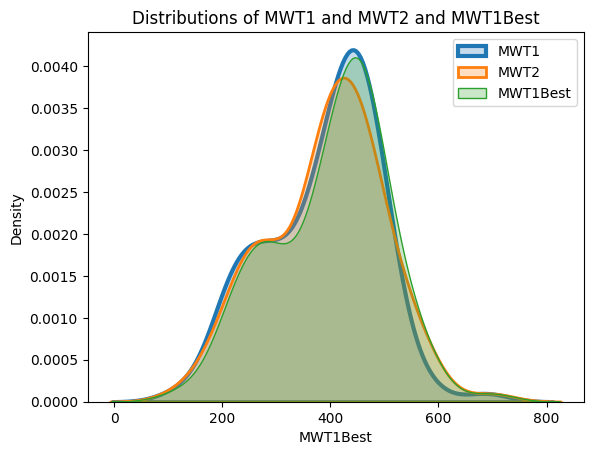

In [ ]:
# Plot the distribution of MWT1 and MWT2 on the same plot
sns.distplot(first['MWT1'], hist=False, kde=True, kde_kws={'shade': True, 'linewidth': 3}, label='MWT1')
sns.distplot(first['MWT2'], hist=False, kde=True, kde_kws={'shade': True, 'linewidth': 2}, label='MWT2')
sns.distplot(first['MWT1Best'], hist=False, kde=True, kde_kws={'shade': True, 'linewidth': 1}, label='MWT1Best')
plt.title('Distributions of MWT1 and MWT2 and MWT1Best')
plt.legend()
plt.show()

<ipython-input-32-6e496f8d8368>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(first['FEV1'], hist=False, kde=True, kde_kws={'shade': True, 'linewidth': 3}, label='FEV1')
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-32-6e496f8d8368>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figu

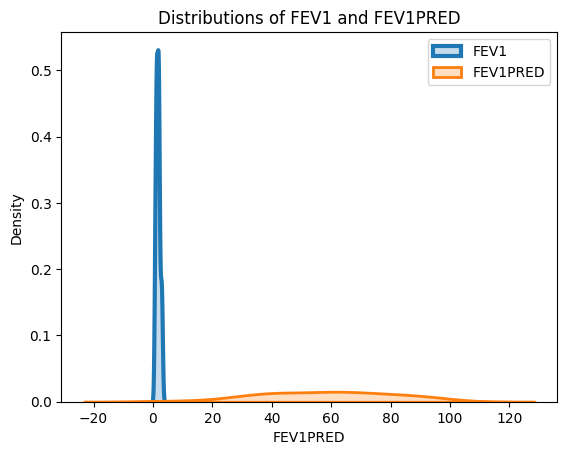

In [ ]:
# Plot the distribution of FEV1 and FEV1PRED on the same plot
sns.distplot(first['FEV1'], hist=False, kde=True, kde_kws={'shade': True, 'linewidth': 3}, label='FEV1')
sns.distplot(first['FEV1PRED'], hist=False, kde=True, kde_kws={'shade': True, 'linewidth': 2}, label='FEV1PRED')
plt.title('Distributions of FEV1 and FEV1PRED')
plt.legend()
plt.show()

<ipython-input-33-2384736fa5f0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(first['FVC'], hist=False, kde=True, kde_kws={'shade': True, 'linewidth': 3}, label='FVC')
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-33-2384736fa5f0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure

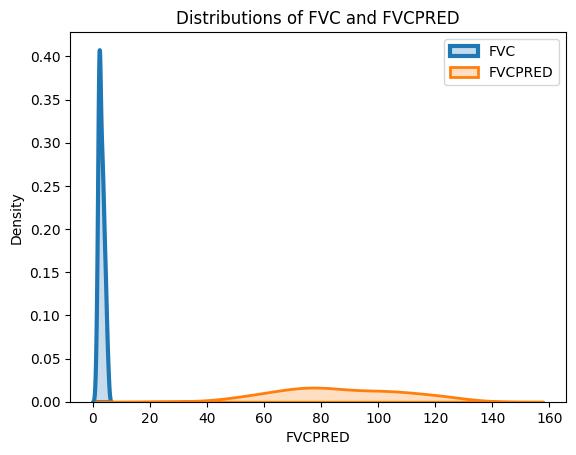

In [ ]:
sns.distplot(first['FVC'], hist=False, kde=True, kde_kws={'shade': True, 'linewidth': 3}, label='FVC')
sns.distplot(first['FVCPRED'], hist=False, kde=True, kde_kws={'shade': True, 'linewidth': 2}, label='FVCPRED')
plt.title('Distributions of FVC and FVCPRED')
plt.legend()
plt.show()

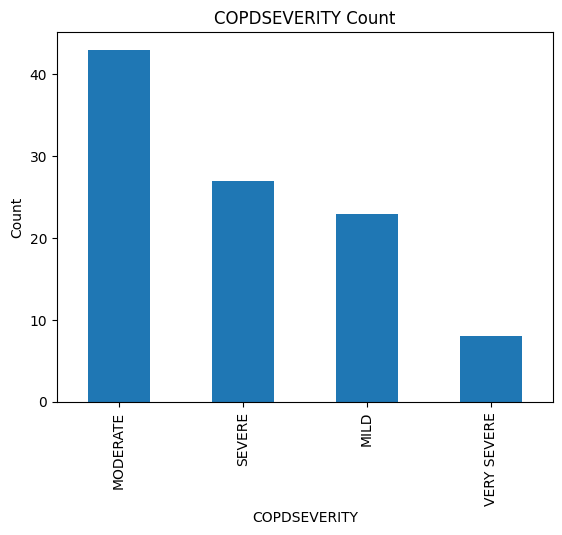

In [ ]:
# Count the number of occurrences for each value in the "COPD" column
copd_counts = first['COPDSEVERITY'].value_counts()

# Create a bar chart to visualize the counts
copd_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('COPDSEVERITY')
plt.ylabel('Count')
plt.title('COPDSEVERITY Count')

# Show the plot
plt.show()

In [ ]:
first['COPDSEVERITY'].value_counts()

COPDSEVERITY
MODERATE       43
SEVERE         27
MILD           23
VERY SEVERE     8
Name: count, dtype: int64

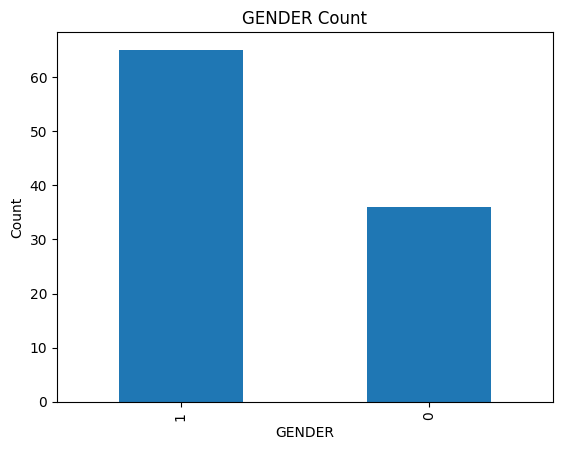

In [ ]:
# Count the number of occurrences for each value in the "gender" column
gender_counts = first['gender'].value_counts()

# Create a bar chart to visualize the counts
gender_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('GENDER')
plt.ylabel('Count')
plt.title('GENDER Count')

# Show the plot
plt.show()

In [ ]:
first['gender'].value_counts()

gender
1    65
0    36
Name: count, dtype: int64

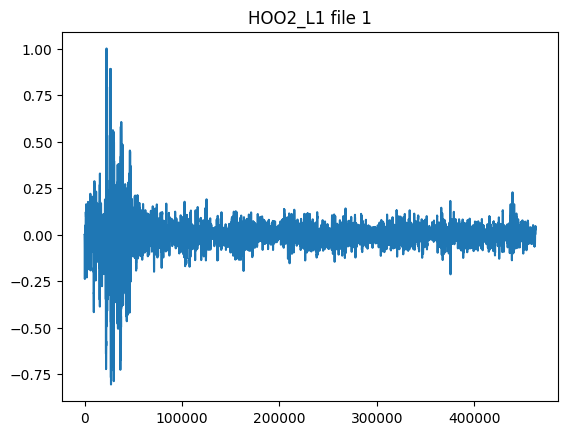

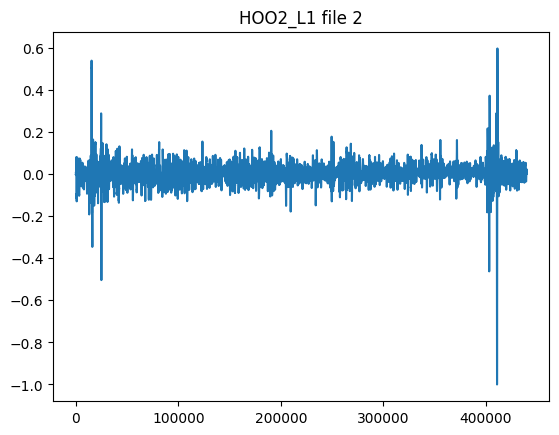

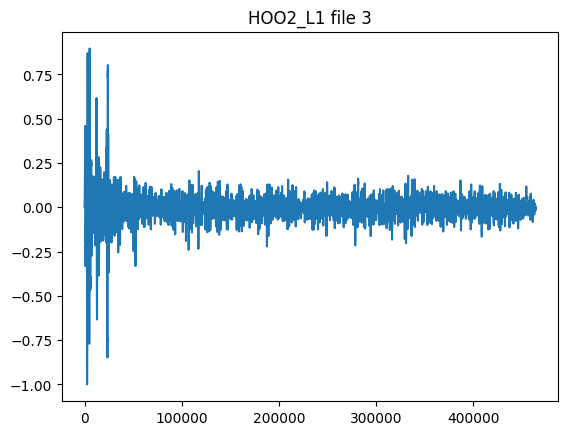

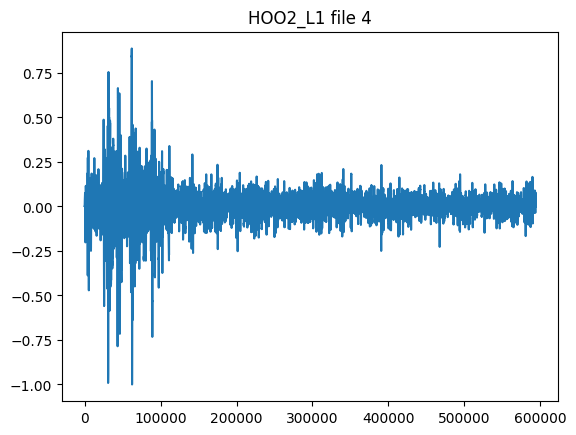

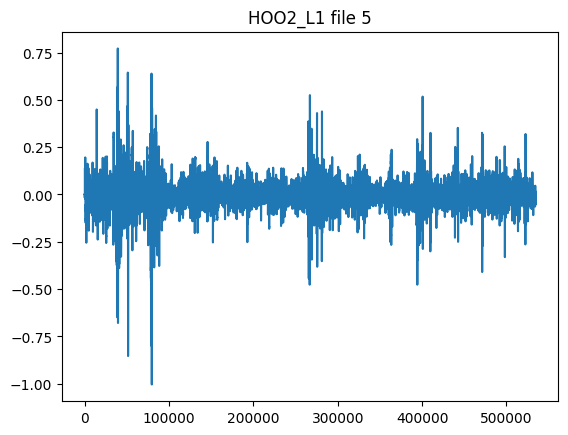

In [ ]:
import matplotlib.pyplot as plt

# Select five audio files
audio_files = audios[:5]

# Plot each audio file
for i, audio in enumerate(audio_files):
  plt.figure(i)
  plt.plot(audio)
  plt.title(f"HOO2_L1 file {i+1}")
  plt.show()

In [5]:
#first = first.drop(columns=['Unnamed: 0', 'ID'], axis= 1)
Y = first['COPDSEVERITY']
X = first.drop(['COPDSEVERITY'], axis=1)

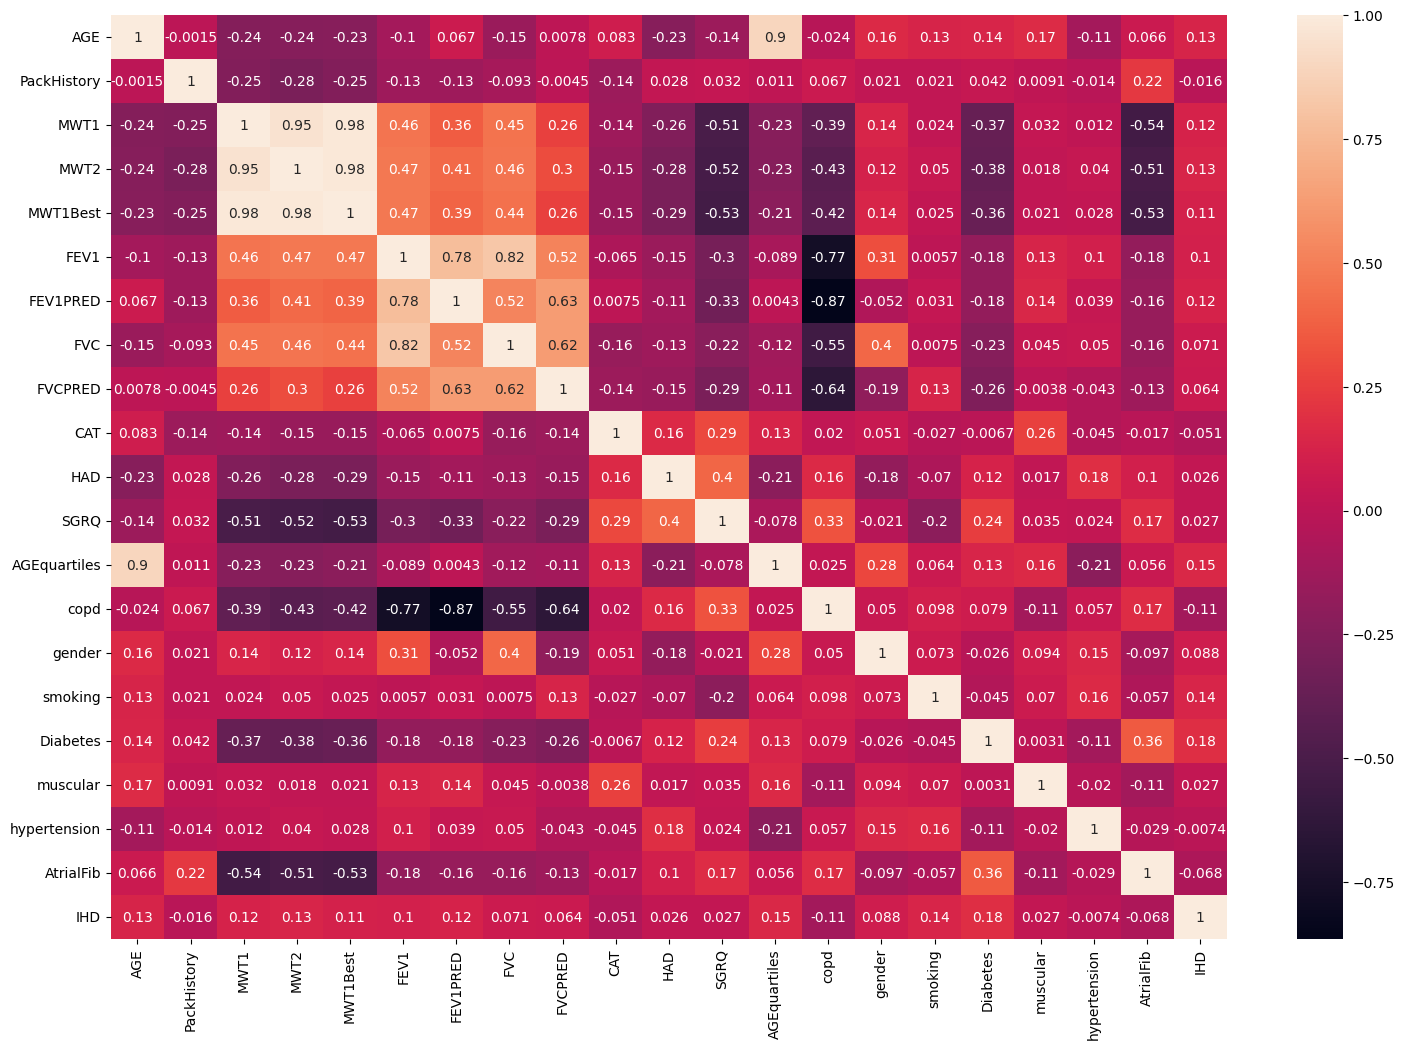

In [ ]:
#check for correlation
plt.figure(figsize=(18,12))
corr = X.corr()
sns.heatmap(corr, annot=True)
plt.show()

## PREPROCESSING AUDIO FILES

In [8]:
def denoise_audio(audio_data):
  """
  Denoises the given audio data using a simple moving average filter.

  Args:
    audio_data: A list of arrays containing the audio data.

  Returns:
    A list of arrays containing the denoised audio data.
  """

  denoised_audio = []
  for audio in audio_data:
    # Create a moving average filter
    window_size = 500
    weights = np.ones(window_size) / window_size

    # Apply the filter to the audio data
    denoised_audio.append(np.convolve(audio, weights, mode='same'))

  return denoised_audio

denoised_audios = denoise_audio(audios)

In [6]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

# Encode the labels
le = LabelEncoder()
Y = le.fit_transform(Y)

# Convert y to a Pandas Series to use value_counts()
Y_series = pd.Series(Y)

# Calculate the desired ratio for each class
# For example, let's say you want all classes to have the same number of samples as the most frequent class
desired_ratio = {label: Y_series.value_counts().max() for label in Y_series.unique()}

# Oversample the data
ros = RandomOverSampler(sampling_strategy=desired_ratio)  # Use the dictionary for multi-class
X_resampled, Y_resampled = ros.fit_resample(X, Y)

# Print the counts of each label after oversampling
print(pd.Series(Y_resampled).value_counts())

2    43
1    43
3    43
0    43
Name: count, dtype: int64


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=42, shuffle=True)

In [10]:
# Train a random forest model
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        12

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



In [11]:
import pickle

# Save the model to a file
filename = 'random_forest_model.sav'
pickle.dump(rf, open(filename, 'wb'))

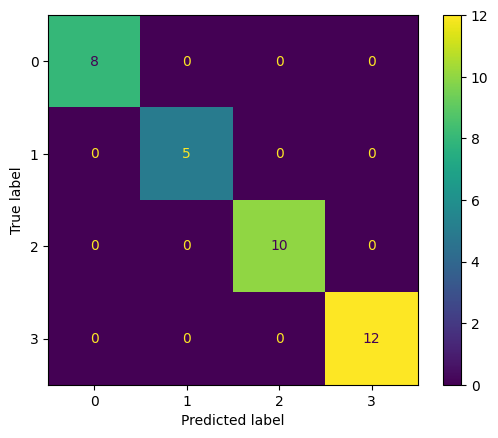

In [ ]:
# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
plt.show()

In [12]:
# Train a decision tree model
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        12

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



In [13]:
# Save the model to a file
filename = 'decision_tree_model.sav'
pickle.dump(dt, open(filename, 'wb'))

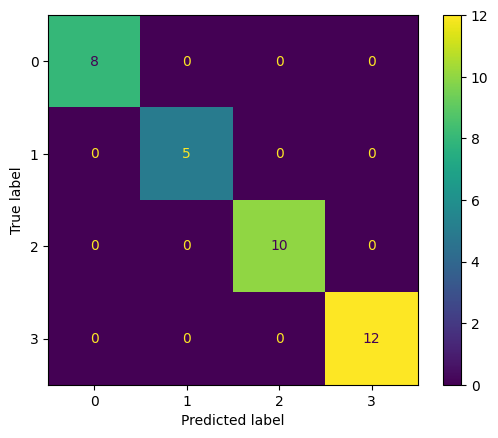

In [ ]:
# Print the confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=dt.classes_)
disp_dt.plot()
plt.show()

In [14]:
lr = LogisticRegression(random_state=42, solver='lbfgs', multi_class='auto')
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.71      1.00      0.83         5
           2       0.86      0.60      0.71        10
           3       0.85      0.92      0.88        12

    accuracy                           0.86        35
   macro avg       0.85      0.88      0.85        35
weighted avg       0.87      0.86      0.85        35



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
# Save the model to a file
filename = 'logistic_regression_model.sav'
pickle.dump(lr, open(filename, 'wb'))

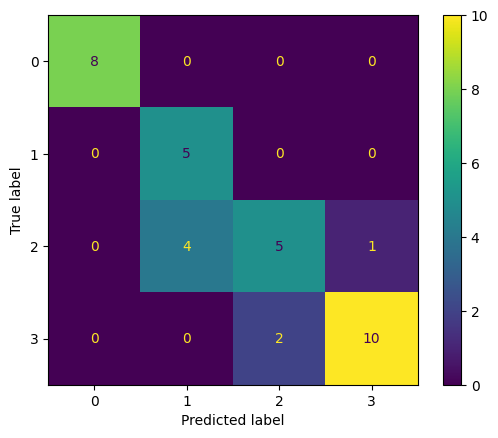

In [ ]:
# Print the confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=lr.classes_)
disp_lr.plot()
plt.show()

In [16]:
gb = GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42)
gb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        12

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



In [18]:
# Save the model to a file
filename = 'gradient_boosting_model.sav'
pickle.dump(gb, open(filename, 'wb'))

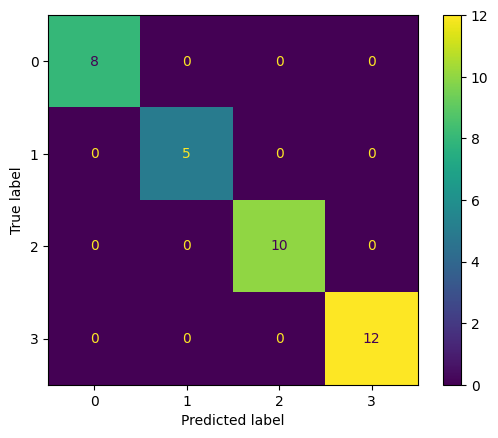

In [ ]:
# Print the confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=gb.classes_)
disp_gb.plot()
plt.show()

In [6]:
# Create a dictionary to map patient IDs to diagnosis
patient_to_diagnosis = dict(zip(sorted(labels['Patient ID'].unique()), sorted(labels['Diagnosis'])))

# Extract patient IDs from audio file names
audio_filenames = os.listdir("/content/RespiratoryDatabase@TR/RespiratoryDatabase@TR")
audio_patient_ids = [filename.split("_")[0] for filename in audio_filenames]

# Map patient IDs to diagnoses
audio_diagnoses = [patient_to_diagnosis[patient_id] for patient_id in audio_patient_ids]

# Create a new series with the mapped diagnoses
labels_new = pd.Series(audio_diagnoses, name="Diagnosis")

In [7]:
diagnosis_to_label = {
    'COPD0': 0,
    'COPD1': 0,
    'COPD2': 0,
    'COPD3': 1,
    'COPD4': 1
}

labels_new = labels_new.map(diagnosis_to_label)

In [8]:
def split_and_pad_audio(audio_data, labels, sample_rate, split_length_seconds):
  """
  Splits and pads audio data into fixed-length segments, and assigns the correct labels.

  Args:
    audio_data: A list of arrays containing the audio data.
    labels: A list of labels corresponding to the audio data.
    sample_rate: The sample rate of the audio data.
    split_length_seconds: The desired length of each audio split in seconds.

  Returns:
    A tuple containing two arrays:
      - X: A 3D numpy array containing the split and padded audio data.
      - y: A 1D numpy array containing the corresponding labels.
  """

  # Calculate the number of samples per split
  split_length_samples = int(split_length_seconds * sample_rate)

  # Initialize empty lists for storing split audio and labels
  split_audio = []
  split_labels = []

  # Iterate through each audio file
  for i, audio in enumerate(audio_data):
    # Calculate the number of splits for the current audio file
    num_splits = len(audio) // split_length_samples

    # Split the audio into fixed-length segments
    for j in range(num_splits):
      start_index = j * split_length_samples
      end_index = (j + 1) * split_length_samples
      split_audio.append(audio[start_index:end_index])
      split_labels.append(labels[i])

  # Pad the last split if it's shorter than the desired length
  if len(split_audio[-1]) < split_length_samples:
    padding_length = split_length_samples - len(split_audio[-1])
    split_audio[-1] = np.pad(split_audio[-1], (0, padding_length), mode='constant')

  # Convert lists to numpy arrays
  X = np.array(split_audio)
  y = np.array(split_labels)

  return X, y

# Split and pad the audio data
X, y = split_and_pad_audio(audios, labels_new, 4000, 10)

# Print the shapes of X and y
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (5786, 40000)
y shape: (5786,)


In [9]:
def create_melspec(audio_data):
  """
  Creates a mel spectrogram for each audio file in the given list.

  Args:
    audio_data: A list of arrays containing the audio data.

  Returns:
    A list of mel spectrograms.
  """

  melspecs = []
  for audio in audio_data:
    melspec = librosa.feature.melspectrogram(y=audio, sr=4000, hop_length=64, win_length=125)
    melspecs.append(melspec)

  return melspecs

melspecs = create_melspec(X)

In [10]:
# Convert the list of melspectrograms to a 3D numpy array
melspecs_array = np.array(melspecs)

# Print the shape of the melspecs array
print("Melspecs array shape:", melspecs_array.shape)

Melspecs array shape: (5786, 128, 626)


In [ ]:
import h5py

# Create an HDF5 file
with h5py.File('melspecs_data.h5', 'w') as hf:
  # Create a dataset for the mel spectrograms
  hf.create_dataset('melspecs', data=melspecs_array)

  # Create a dataset for the labels
  hf.create_dataset('labels', data=y)

In [11]:
from keras.utils import to_categorical

y = to_categorical(y, num_classes=2)

In [12]:
# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(melspecs_array, y, test_size=0.2, random_state=42)

# Split the train set into train and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the train, validation, and test sets
print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", x_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3702, 128, 626)
y_train shape: (3702, 2)
X_val shape: (926, 128, 626)
y_val shape: (926, 2)
X_test shape: (1158, 128, 626)
y_test shape: (1158, 2)


In [13]:
import h5py

#Create HDF5 files for each split
with h5py.File('train_data.h5', 'w') as hf:
    for i in range(len(x_train)):
        group = hf.create_group(str(i))
        group.create_dataset('melspecs', data=x_train[i])
        group.attrs['label'] = y_train[i]

# with h5py.File('val_data.h5', 'w') as hf:
#     for i in range(len(x_val)):
#         group = hf.create_group(str(i))
#         group.create_dataset('melspecs', data=x_val[i])
#         group.attrs['label'] = y_val[i]

# with h5py.File('test_data.h5', 'w') as hf:
#     for i in range(len(x_test)):
#         group = hf.create_group(str(i))
#         group.create_dataset('melspecs', data=x_test[i])
#         group.attrs['label'] = y_test[i]

In [17]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.5 MB/s eta 0:00:00


In [19]:
# Reshape the input data for Conv2D
x_train_2d = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_val_2d = x_val.reshape(x_val.shape[0], x_val.shape[1], x_val.shape[2], 1)
x_test_2d = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

In [21]:
import keras_tuner as kt
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Function to build the model
def build_model(hp):
    model = Sequential()
    model.add(Conv2D(hp.Int('conv1_filters', min_value=32, max_value=128, step=32),
                     (3, 3), activation='relu', input_shape=(x_train_2d.shape[1], x_train_2d.shape[2], 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(hp.Float('dropout1_rate', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(Conv2D(hp.Int('conv2_filters', min_value=32, max_value=128, step=32), (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(hp.Int('conv3_filters', min_value=32, max_value=128, step=32), (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(hp.Float('dropout2_rate', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(Conv2D(hp.Int('conv4_filters', min_value=32, max_value=128, step=32), (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(hp.Int('conv5_filters', min_value=32, max_value=128, step=32), (3, 3), activation='relu'))
    model.add(Flatten())

    model.add(Dense(hp.Int('dense_units', min_value=64, max_value=256, step=64), activation='relu',
                    kernel_regularizer=keras.regularizers.l2(hp.Float('l2', min_value=0.0001, max_value=0.01, step=0.0005))))
    model.add(Dropout(hp.Float('dropout3_rate', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(2, activation='softmax'))

    model.compile(optimizer=keras.optimizers.Adam(hp.Float('learning_rate', min_value=0.0001, max_value=0.01, step=0.0005)),
                  loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
# Hyperparameter tuner
tuner = kt.Hyperband(build_model, objective='val_accuracy', max_epochs=50, factor=3, directory='my_dir', project_name='cnn_tuning')

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Search for the best hyperparameters
tuner.search(x_train_2d, y_train, epochs=50, validation_data=(x_val_2d, y_val), callbacks=[early_stopping, reduce_lr])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters and train it
model = tuner.hypermodel.build(best_hps)
history = model.fit(x_train_2d, y_train, epochs=50, validation_data=(x_val_2d, y_val), callbacks=[early_stopping, reduce_lr])

Trial 3 Complete [00h 05m 31s]
val_accuracy: 0.5950323939323425

Best val_accuracy So Far: 0.5950323939323425
Total elapsed time: 00h 24m 11s

Search: Running Trial #4

Value             |Best Value So Far |Hyperparameter
96                |32                |conv1_filters
0.1               |0.3               |dropout1_rate
32                |128               |conv2_filters
128               |64                |conv3_filters
0.3               |0.5               |dropout2_rate
96                |96                |conv4_filters
96                |96                |conv5_filters
128               |64                |dense_units
0.0036            |0.0021            |l2
0.4               |0.4               |dropout3_rate
0.0011            |0.0006            |learning_rate
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
3                 |3                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1

In [ ]:
# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(x_train_2d.shape[1], x_train_2d.shape[2], 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))  # 2 output classes

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Add early stopping
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

In [ ]:
# Train the model
history_2d = model.fit(x_train_2d, y_train, epochs=50, batch_size=32, validation_data=(x_val_2d, y_val), callbacks=[early_stopping, reduce_lr])

Epoch 1/50
116/116 [==============================] - 166s 1s/step - loss: 1.9045 - accuracy: 0.5581 - val_loss: 1.1297 - val_accuracy: 0.5950 - lr: 0.0010
Epoch 2/50
116/116 [==============================] - 163s 1s/step - loss: 1.0067 - accuracy: 0.5816 - val_loss: 0.9079 - val_accuracy: 0.5950 - lr: 0.0010
Epoch 3/50
116/116 [==============================] - 163s 1s/step - loss: 0.8583 - accuracy: 0.5862 - val_loss: 0.8114 - val_accuracy: 0.5950 - lr: 0.0010
Epoch 4/50
116/116 [==============================] - 162s 1s/step - loss: 0.7888 - accuracy: 0.5805 - val_loss: 0.7571 - val_accuracy: 0.5983 - lr: 0.0010
Epoch 5/50
116/116 [==============================] - 163s 1s/step - loss: 0.7487 - accuracy: 0.5886 - val_loss: 0.7369 - val_accuracy: 0.5961 - lr: 0.0010
Epoch 6/50
116/116 [==============================] - 163s 1s/step - loss: 0.7282 - accuracy: 0.5929 - val_loss: 0.7215 - val_accuracy: 0.5950 - lr: 0.0010
Epoch 7/50
116/116 [==============================] - 164s 1s/st

In [ ]:
# Increase the complexity of the model
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=5, activation='relu', padding='same', input_shape=(128, 626)))
model.add(MaxPooling1D(pool_size=3, strides=2, padding='same'))
model.add(Dropout(0.3))  # Increased dropout
model.add(Conv1D(filters=1024, kernel_size=5, activation='relu', padding='same')) # Increased filters
model.add(Conv1D(filters=1024, kernel_size=5, activation='relu', padding='same')) # Increased filters
model.add(Dropout(0.3))  # Increased dropout
model.add(Conv1D(filters=256, kernel_size=5, activation='relu', padding='same')) # Increased filters
model.add(Conv1D(filters=256, kernel_size=5, activation='relu', padding='same')) # Increased filters
model.add(Dropout(0.2))  # Increased dropout
model.add(Flatten())
model.add(Dense(units=1024, activation='relu'))  # Increased units
model.add(Dropout(0.2))  # Increased dropout
model.add(Dense(units=1, activation='softmax'))
model.summary()

# Use a learning rate scheduler
from keras.callbacks import ReduceLROnPlateau
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)

# Add early stopping
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_32 (Conv1D)          (None, 128, 256)          801536    
                                                                 
 max_pooling1d_12 (MaxPooli  (None, 64, 256)           0         
 ng1D)                                                           
                                                                 
 dropout_19 (Dropout)        (None, 64, 256)           0         
                                                                 
 conv1d_33 (Conv1D)          (None, 64, 1024)          1311744   
                                                                 
 conv1d_34 (Conv1D)          (None, 64, 1024)          5243904   
                                                                 
 dropout_20 (Dropout)        (None, 64, 1024)          0         
                                                      

In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with more epochs and the learning rate scheduler
history = model.fit(x_train, y_train, epochs=50, batch_size=32,
                    validation_data=(x_val, y_val), callbacks=[lr_scheduler, early_stopping])

Epoch 1/50
116/116 [==============================] - 42s 347ms/step - loss: 0.9460 - accuracy: 0.5875 - val_loss: 0.6838 - val_accuracy: 0.5691 - lr: 0.0010
Epoch 2/50
116/116 [==============================] - 40s 347ms/step - loss: 0.6750 - accuracy: 0.5875 - val_loss: 0.6762 - val_accuracy: 0.5691 - lr: 0.0010
Epoch 3/50
116/116 [==============================] - 39s 340ms/step - loss: 0.6677 - accuracy: 0.5875 - val_loss: 0.6804 - val_accuracy: 0.5691 - lr: 0.0010
Epoch 4/50
116/116 [==============================] - 40s 341ms/step - loss: 0.6676 - accuracy: 0.5875 - val_loss: 0.6825 - val_accuracy: 0.5691 - lr: 0.0010
Epoch 5/50
116/116 [==============================] - 40s 341ms/step - loss: 0.6563 - accuracy: 0.5875 - val_loss: 0.7007 - val_accuracy: 0.5691 - lr: 0.0010
Epoch 6/50
116/116 [==============================] - 39s 340ms/step - loss: 0.6452 - accuracy: 0.5875 - val_loss: 0.6916 - val_accuracy: 0.5691 - lr: 0.0010
Epoch 7/50
116/116 [==============================] 

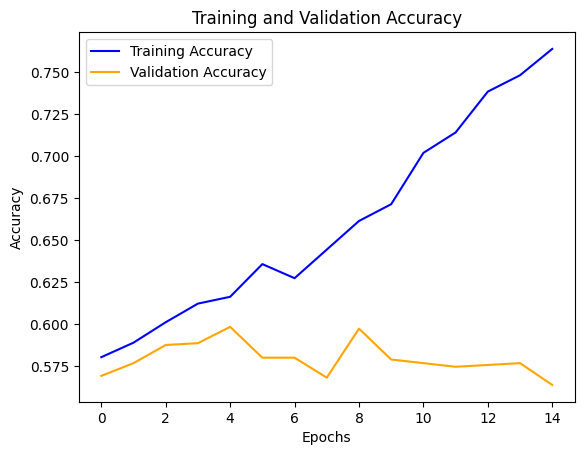

In [ ]:
# Get the accuracy values from the history dictionary
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Get the number of epochs
epochs = range(len(accuracy))

# Plot the accuracy and validation accuracy curves
plt.plot(epochs, accuracy, color='blue', label='Training Accuracy')
plt.plot(epochs, val_accuracy, color='orange', label='Validation Accuracy')

# Add labels and title
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Add legend and show the plot
plt.legend()
plt.show()

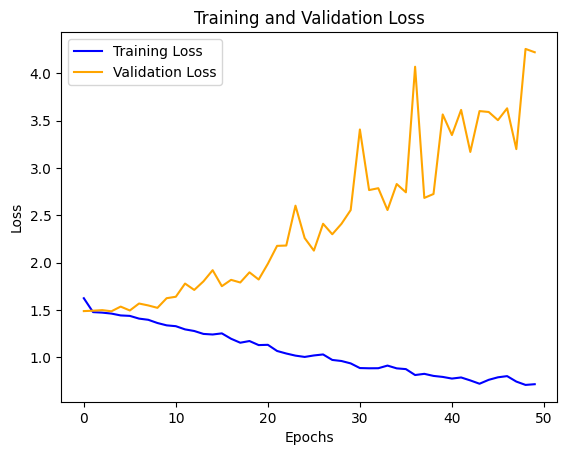

In [ ]:
# Get the loss values from the history dictionary
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(len(loss))

# Plot the loss and validation loss curves
plt.plot(epochs, loss, color='blue', label='Training Loss')
plt.plot(epochs, val_loss, color='orange', label='Validation Loss')

# Add labels and title
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Add legend and show the plot
plt.legend()
plt.show()


In [ ]:
# Increase the complexity of the model
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=5, activation='relu', padding='same', input_shape=(128, 626)))
model.add(MaxPooling1D(pool_size=3, strides=2, padding='same'))
model.add(Dropout(0.3))  # Increased dropout
model.add(Conv1D(filters=512, kernel_size=5, activation='relu', padding='same'))
model.add(Conv1D(filters=512, kernel_size=5, activation='relu', padding='same'))
model.add(MaxPooling1D(pool_size=3, strides=2, padding='same'))
model.add(Conv1D(filters=1024, kernel_size=5, activation='relu', padding='same')) # Increased filters
model.add(Conv1D(filters=1024, kernel_size=5, activation='relu', padding='same')) # Increased filters
model.add(Dropout(0.3))  # Increased dropout
model.add(Flatten())
model.add(Dense(units=1024, activation='relu'))  # Increased units
model.add(Dropout(0.5))  # Increased dropout
model.add(Dense(units=5, activation='softmax'))
model.summary()

# Use a learning rate scheduler
from keras.callbacks import ReduceLROnPlateau
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with more epochs and the learning rate scheduler
history = model.fit(x_train, y_train, epochs=100, batch_size=32,
                    validation_data=(x_val, y_val), callbacks=[lr_scheduler])

# Evaluate the model on the test set
_, accuracy = model.evaluate(x_test, y_test)
print('Test Accuracy: {:.2f}%'.format(accuracy * 100))

# Plot the training and validation accuracy and loss curves
# ... (same plotting code as before)

37/37 [==============================] - 3s 69ms/step


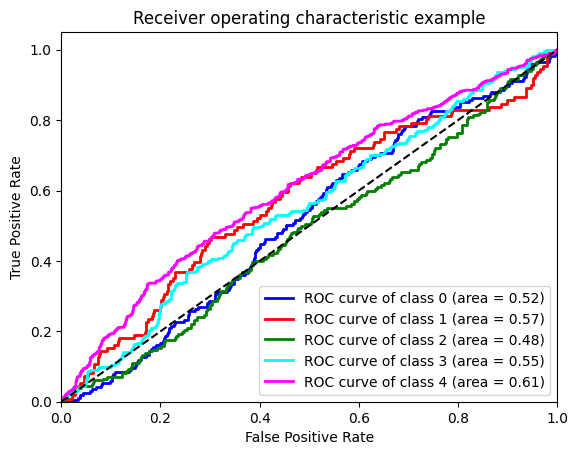

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the test set
y_pred_proba = model.predict(x_test)

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 5
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
colors = ['blue', 'red', 'green', 'cyan', 'magenta']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()